<a href="https://colab.research.google.com/github/keedjk7/Linear_Diamonds/blob/main/Diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv("Linear_Data/diamonds.csv",usecols=[1,2,3,4,5,6,7,8,9,10])
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,7,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,6,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,3,0,6,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,0,6,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,4,7,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [13]:
data.shape

(53940, 10)

In [9]:
data.head(n=7)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,7,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,6,3,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,5,2,62.3,57.0,336,3.95,3.98,2.47


In [10]:
data.columns.values

array(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x',
       'y', 'z'], dtype=object)

In [11]:
lines = [line for line in data]

In [12]:
lines

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

In [16]:
%matplotlib inline

In [17]:
test = data[["carat","price"]]
test

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


In [18]:
lines_test = [line for line in test]
lines_test

['carat', 'price']

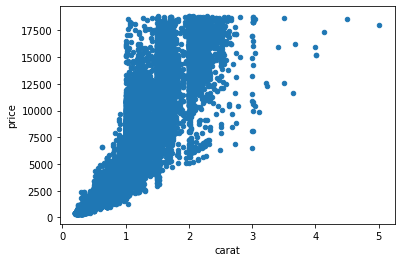

In [19]:
test.plot.scatter(x='carat' , y='price',)

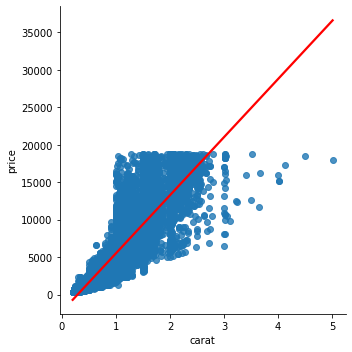

In [20]:
sns.lmplot(x = 'carat' , y = 'price' , data = test , ci =None,
            line_kws = {'color' : 'red'})

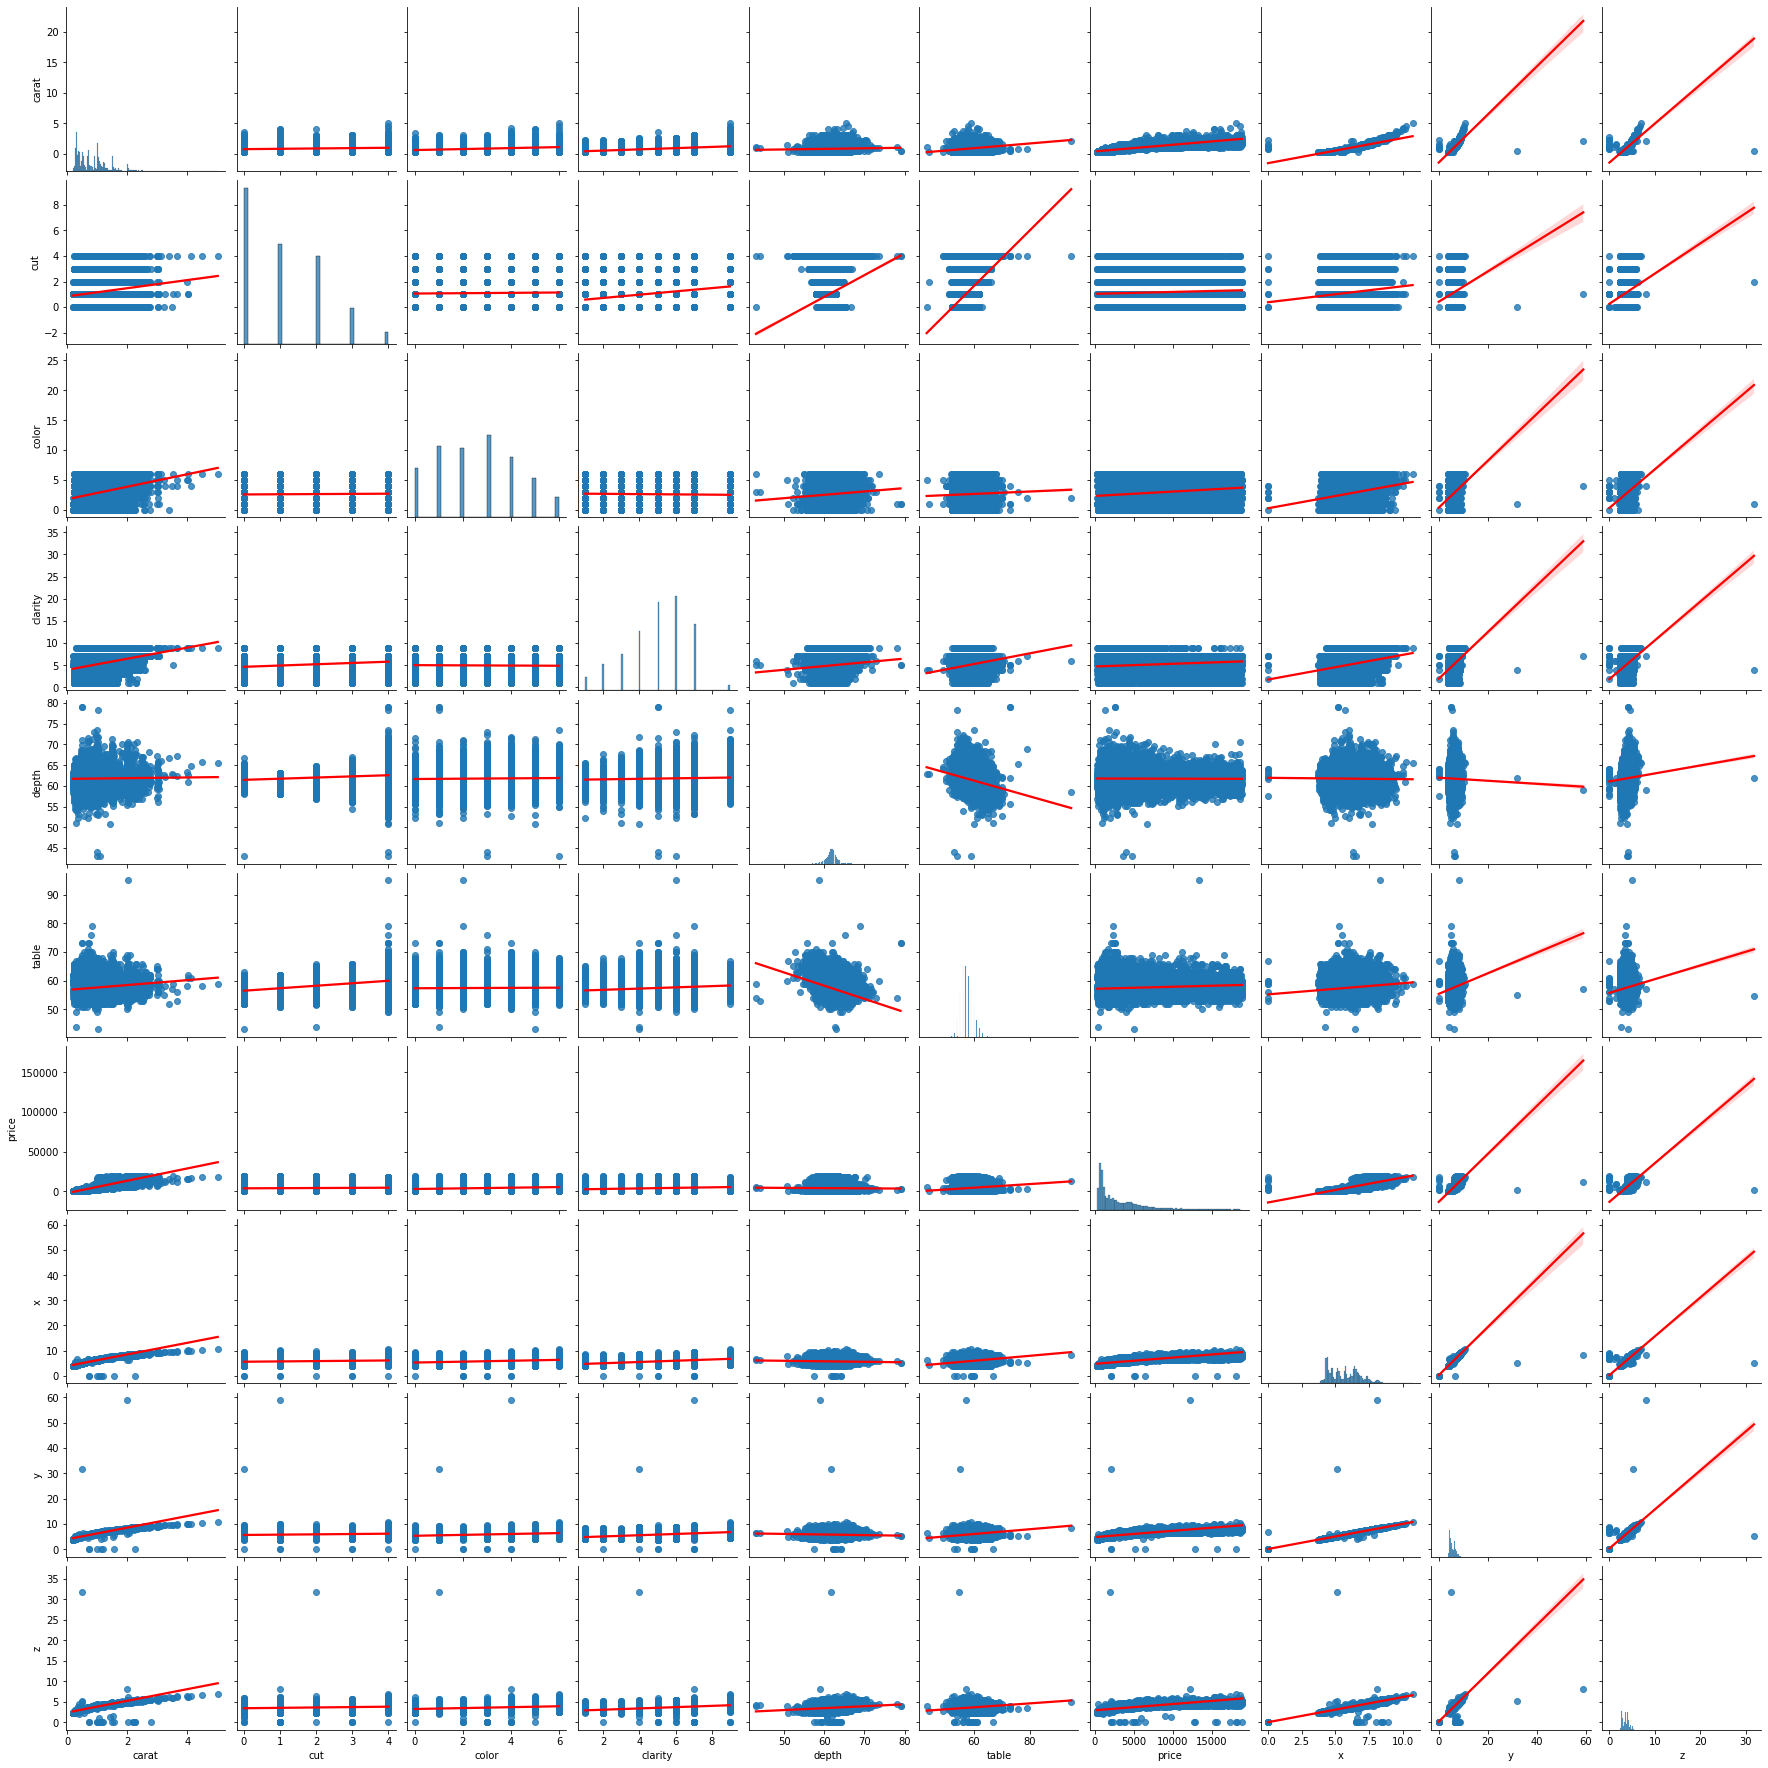

In [22]:
sns.pairplot(data,kind='reg', plot_kws = {'line_kws':{'color':'red'}})

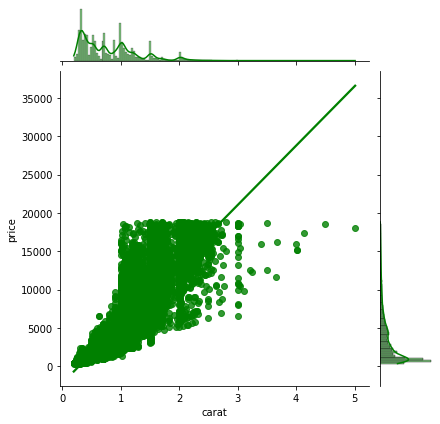

In [25]:
sns.jointplot(x='carat' , y= 'price' , data = data , kind = 'reg' , ci = None , color = 'green')

# **Multiple Regression**

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
X = data.drop(columns=['price'])
Y = data['price']

In [33]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,0,1,7,61.5,55.0,3.95,3.98,2.43
1,0.21,1,1,6,59.8,61.0,3.89,3.84,2.31
2,0.23,3,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,1,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,3,6,7,63.3,58.0,4.34,4.35,2.75


In [34]:
Y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [29]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
model.score(X,Y) #R-squared

0.9089370833646694

In [31]:
model.intercept_

9920.771756899236

In [41]:
model.coef_

array([10769.46859945,  -116.85444014,  -323.62361787,  -506.86184382,
         -76.24959344,   -25.98369875,  -871.43625014,    38.95224424,
         -35.62276905])

In [43]:
model.predict([[0.22, 1 , 4 , 5 ,55.5 , 59.75 , 3.55 , 3.87 , 2.22]])

array([-461.91776793])

In [38]:
model.predict([[0.25, 0 , 2 , 5 ,60.5 , 59.75 , 3.55 , 3.87 , 2.22]])

array([244.01999875])

In [45]:
x_test = data.drop(columns=['price'])
x_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,0,1,7,61.5,55.0,3.95,3.98,2.43
1,0.21,1,1,6,59.8,61.0,3.89,3.84,2.31
2,0.23,3,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,1,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,3,6,7,63.3,58.0,4.34,4.35,2.75


In [46]:
y_test = model.predict(x_test)
y_test

array([-966.06700209, -766.61926094,  215.50316052, ..., 2999.12595428,
       2810.67884719, 3296.52161288])

In [48]:
predict_data = pd.concat([data.reset_index() , pd.Series(y_test, name='predict')], axis = 'columns')
predict_data

,index,carat,cut,color,clarity,depth,table,price,x,y,z,predict
0,0,0.23,0,1,7,61.5,55.0,326,3.95,3.98,2.43,-966.067002
1,1,0.21,1,1,6,59.8,61.0,326,3.89,3.84,2.31,-766.619261
2,2,0.23,3,1,4,56.9,65.0,327,4.05,4.07,2.31,215.503161
3,3,0.29,1,5,5,62.4,58.0,334,4.20,4.23,2.63,-1079.345396
4,4,0.31,3,6,7,63.3,58.0,335,4.34,4.35,2.75,-2625.238382
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,0,0,6,60.8,57.0,2757,5.75,5.76,3.50,3605.498773
53936,53936,0.72,3,0,6,63.1,55.0,2757,5.69,5.75,3.61,3179.506933
53937,53937,0.70,2,0,6,62.8,60.0,2757,5.66,5.68,3.56,2999.125954
53938,53938,0.86,1,4,7,61.0,58.0,2757,6.15,6.12,3.74,2810.678847


# **Test**

In [23]:
size_row = test.shape

In [24]:
size_row[0]

53940

In [ ]:
carat_mean = data["carat"].mean()

In [ ]:
carat_mean

0.7979397478679852

In [ ]:
price_mean = data["price"].mean()
price_mean

3932.799721913237

In [ ]:
test1 = data[["color","price"]]
test1

,color,price
0,2,326
1,2,326
2,2,327
3,6,334
4,7,335
...,...,...
53935,1,2757
53936,1,2757
53937,1,2757
53938,5,2757


In [ ]:
test1.color.value_counts()#count same data

4    11292
2     9797
3     9542
5     8304
1     6775
6     5422
7     2808
Name: color, dtype: int64

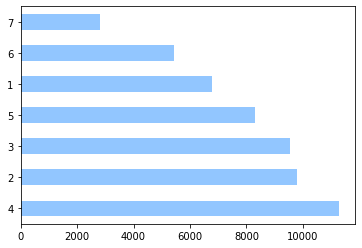

In [ ]:
test1.color.value_counts().plot.barh()

In [ ]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.074224,0.295667,0.274307,0.026255,0.121631,0.833648,0.968834,0.967553,0.958978
cut,0.074224,1.000000,-0.033827,0.121290,0.258420,0.400820,-0.047400,0.031374,0.031187,0.080155
color,0.295667,-0.033827,1.000000,-0.032641,0.035008,-0.001674,0.096872,0.250340,0.248081,0.252132
clarity,0.274307,0.121290,-0.032641,1.000000,0.053236,0.112600,-0.098973,0.258995,0.251745,0.259555
depth,0.026255,0.258420,0.035008,0.053236,1.000000,-0.280423,-0.037569,-0.066579,-0.071228,0.121165
table,0.121631,0.400820,-0.001674,0.112600,-0.280423,1.000000,0.036471,0.130780,0.122304,0.070583
price,0.833648,-0.047400,0.096872,-0.098973,-0.037569,0.036471,1.000000,0.825074,0.830597,0.808942
x,0.968834,0.031374,0.250340,0.258995,-0.066579,0.130780,0.825074,1.000000,0.995586,0.970707
y,0.967553,0.031187,0.248081,0.251745,-0.071228,0.122304,0.830597,0.995586,1.000000,0.968459
z,0.958978,0.080155,0.252132,0.259555,0.121165,0.070583,0.808942,0.970707,0.968459,1.000000
